![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [95]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [96]:
year_str = 2020
peak_covid = "home_workout_worldwide"
current = "gym_workout_worldwide"
top_country = 'United States'
home_workout_geo = 'Philippines'

When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

In [97]:
# Start coding here
workout = pd.read_csv("data/workout.csv")
print(workout.info())
print(workout.head())

# print(workout['month'].value_counts())
# print(workout['month'].unique())
# print(workout.describe())

single_date_str = '2018-03' 
single_date = datetime.strptime(single_date_str, '%Y-%m')
print(single_date, type(single_date))

dates = []
for i in list(workout['month']):
    x = datetime.strptime(i, '%Y-%m')
    dates.append(x)
    
# print(dates)

workout['month'] = dates

print(workout.head())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              61 non-null     object
 1   workout_worldwide  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
     month  workout_worldwide
0  2018-03                 59
1  2018-04                 61
2  2018-05                 57
3  2018-06                 56
4  2018-07                 51
2018-03-01 00:00:00 <class 'datetime.datetime'>
       month  workout_worldwide
0 2018-03-01                 59
1 2018-04-01                 61
2 2018-05-01                 57
3 2018-06-01                 56
4 2018-07-01                 51


In [98]:
workout_2 = workout.sort_values(by='month')
print(workout_2.head())
print(workout_2.info())

       month  workout_worldwide
0 2018-03-01                 59
1 2018-04-01                 61
2 2018-05-01                 57
3 2018-06-01                 56
4 2018-07-01                 51
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              61 non-null     datetime64[ns]
 1   workout_worldwide  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB
None


In [99]:
workout_2['month'] = workout_2['month'].dt.strftime('%Y-%m')
print(workout_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              61 non-null     object
 1   workout_worldwide  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None


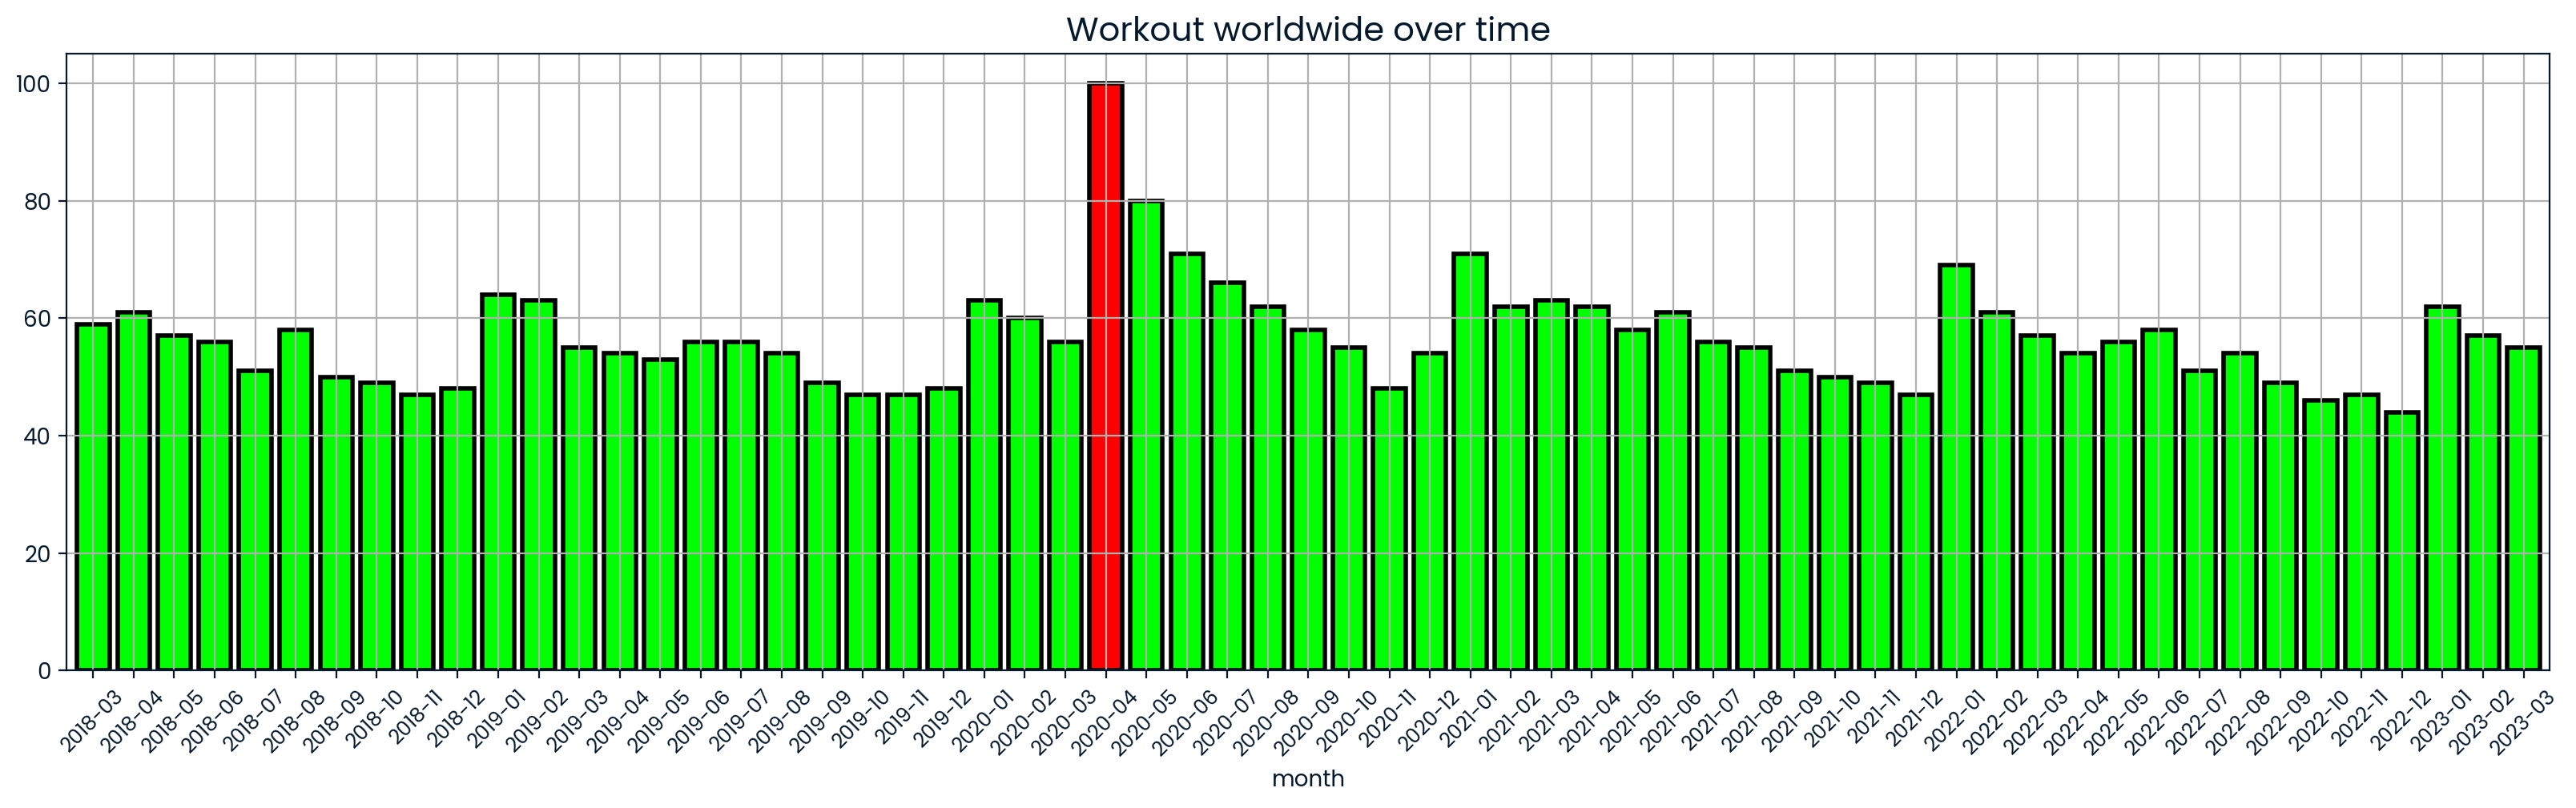

In [100]:
# Create a color list: Default 'lime', but max bar 'red'
max_value = workout_2['workout_worldwide'].max()
colors = ['lime' if val != max_value else 'red' for val in workout_2['workout_worldwide']]

ax=\
workout_2.plot.bar(x='month', y='workout_worldwide', legend=False, grid = True, figsize=[20,5], color=colors, edgecolor='black', width=0.8, linewidth=2)
plt.xticks(rotation=45, size=9)

plt.title("Workout worldwide over time", size=15)

plt.show()

In [101]:
print(workout_2['workout_worldwide'].max())

workout_max_row = \
workout_2[workout_2['workout_worldwide'] == workout_2['workout_worldwide'].max()]

workout_max_year = \
workout_2.loc[workout_2['workout_worldwide'] == workout_2['workout_worldwide'].max(), 'month'].str[:4]

workout_max_year = workout_max_year.iloc[0]

# print(workout_2.info())

print(workout_max_year)
print(type(workout_max_year))

year_str = workout_max_year
print(year_str)

100
2020
<class 'str'>
2020


Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now?  
Save your answers as variables called peak_covid and current respectively.

In [102]:
three_keywords = pd.read_csv("data/three_keywords.csv")

three_keywords['month'] = pd.to_datetime(three_keywords['month'], format = "%Y-%m")

print(three_keywords.info())
print(three_keywords.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   month                   61 non-null     datetime64[ns]
 1   home_workout_worldwide  61 non-null     int64         
 2   gym_workout_worldwide   61 non-null     int64         
 3   home_gym_worldwide      61 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.0 KB
None
       month  home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
0 2018-03-01                      12                     16                  10
1 2018-04-01                      12                     18                  10
2 2018-05-01                      13                     16                   9
3 2018-06-01                      12                     17                   9
4 2018-07-01                      12                     17                 

82
2020-04-01 00:00:00


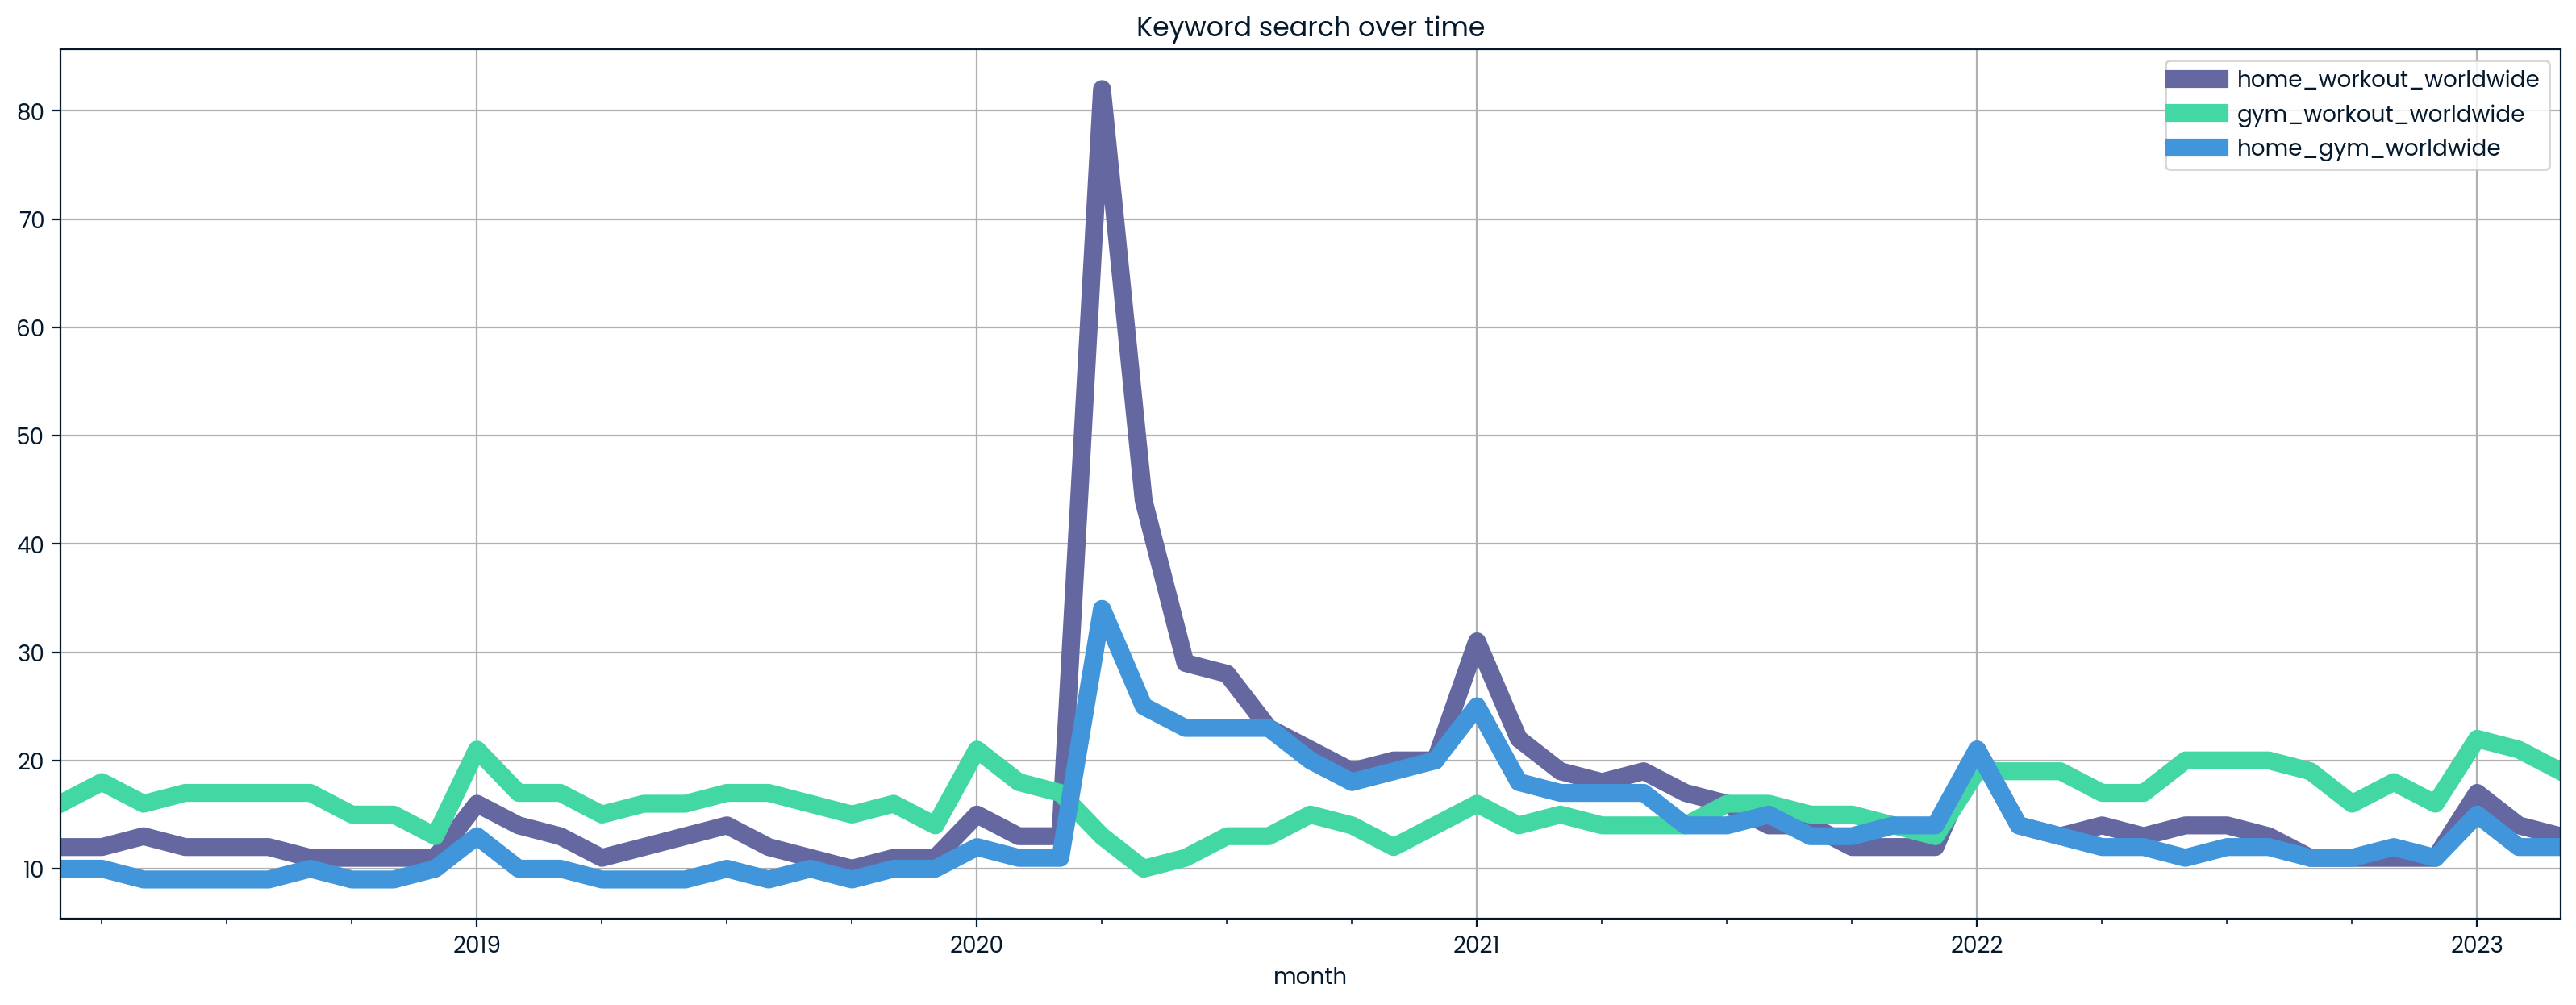

In [103]:


max_homework_value = three_keywords['home_workout_worldwide'].max()
print(max_homework_value)
max_homework_month = three_keywords.loc[three_keywords['home_workout_worldwide'].idxmax(), 'month']
print(max_homework_month)

ax = three_keywords.plot.line(x='month', figsize=(20,7), grid=True, linewidth=8)
plt.title("Keyword search over time")

ax.annotate(
    f'Max home workout value worldwide: {max_homework_value:.0f}',  # Text (formatted to 0 decimal places)
    xy=(three_keywords['month'].tolist().index(max_homework_month), max_homework_value),  # Point to annotate
    xytext=(20, -10),           # Text position offset
    textcoords='offset points', # Coordinate system for xytext
    fontsize=20,
    color='red'
)

plt.show()

In [104]:
covid_start = "2020-01"
covid_end = "2021-12"

In [105]:
# print(three_keywords.info())
# print(three_keywords.index)


covid_subset = \
three_keywords.loc[(three_keywords['month'] >= covid_start) & (three_keywords['month'] <= covid_end)]

print(covid_subset.info())
print(covid_subset.describe().round(2))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 22 to 45
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   month                   24 non-null     datetime64[ns]
 1   home_workout_worldwide  24 non-null     int64         
 2   gym_workout_worldwide   24 non-null     int64         
 3   home_gym_worldwide      24 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 960.0 bytes
None
       home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
count                   24.00                  24.00               24.00
mean                    22.21                  14.46               17.92
std                     14.75                   2.26                5.51
min                     12.00                  10.00               11.00
25%                     14.00                  13.00               14.00
50%                     19.00   

In [106]:
print(covid_subset.max())

month                     2021-12-01 00:00:00
home_workout_worldwide                     82
gym_workout_worldwide                      21
home_gym_worldwide                         34
dtype: object


In [107]:
covid_subset.loc[covid_subset['home_workout_worldwide'] == \
                 covid_subset['home_workout_worldwide'].max()]

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
25,2020-04-01,82,13,34


In [108]:
# Which one is the current year?
# three_keywords.info()
# print(three_keywords.describe(include=[np.datetime64]))
print(three_keywords['month'].dt.year.unique())

[2018 2019 2020 2021 2022 2023]


In [109]:
current_year = "2022-12-31"
current_year_subset = \
three_keywords[three_keywords['month'] > current_year]

print(current_year_subset.info())
print(current_year_subset.head())
print(current_year_subset.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 58 to 60
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   month                   3 non-null      datetime64[ns]
 1   home_workout_worldwide  3 non-null      int64         
 2   gym_workout_worldwide   3 non-null      int64         
 3   home_gym_worldwide      3 non-null      int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 120.0 bytes
None
        month  ...  home_gym_worldwide
58 2023-01-01  ...                  15
59 2023-02-01  ...                  12
60 2023-03-01  ...                  12

[3 rows x 4 columns]
       home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
count                3.000000               3.000000            3.000000
mean                14.666667              20.666667           13.000000
std                  2.081666               1.527525            1.732051
m

In [110]:
peak_covid = "home_workout_worldwide"
current = "gym_workout_worldwide"


What country has the highest interest for workouts among the following: United States, Australia, or Japan? 
Save your answer as top_country.

In [111]:
from pathlib import Path
import logging

try:
    geo = pd.read_csv(Path("data")/ "workout_geo.csv")
except FileNotFoundError:
    print("Error: file not found")
    raise
    
# logging.info(geo.info())
# print(geo.head())
# print(geo.tail())
print(geo.head())

                             country  workout_2018_2023
0                               Guam                NaN
1  Falkland Islands (Islas Malvinas)                NaN
2                       Cook Islands                NaN
3                             Brunei                NaN
4                              Palau                NaN


In [112]:
geo_subset_countries = geo.loc[ geo['country'].isin( ['United States', 'Australia', 'Japan']), :]

geo_subset_countries

,country,workout_2018_2023
5,United States,100.0
18,Australia,77.0
216,Japan,1.0


In [113]:

geo_usa = \
geo_subset_countries.loc[geo_subset_countries['country'] == 'United States', \
                         'country']

print(geo_usa)

top_country = geo_usa.iloc[0]

print(type(top_country))
print(top_country)
# top_country = 'United States'

5    United States
Name: country, dtype: object
<class 'str'>
United States


You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

In [114]:
try:
    mesa = pd.read_csv("data/three_keywords_geo.csv")
except FileNotFoundError:
    print("Error: file not found")
    raise
    
print(mesa.info())
print(mesa.isnull().sum())
mesa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 250 non-null    object 
 1   home_workout_2018_2023  47 non-null     float64
 2   gym_workout_2018_2023   47 non-null     float64
 3   home_gym_2018_2023      47 non-null     float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB
None
Country                     0
home_workout_2018_2023    203
gym_workout_2018_2023     203
home_gym_2018_2023        203
dtype: int64


,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


In [115]:
philly = \
mesa.loc[mesa['Country'].isin(['Philippines', 'Malaysia']), :]

philly

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
23,Philippines,52.0,38.0,10.0
61,Malaysia,47.0,38.0,15.0


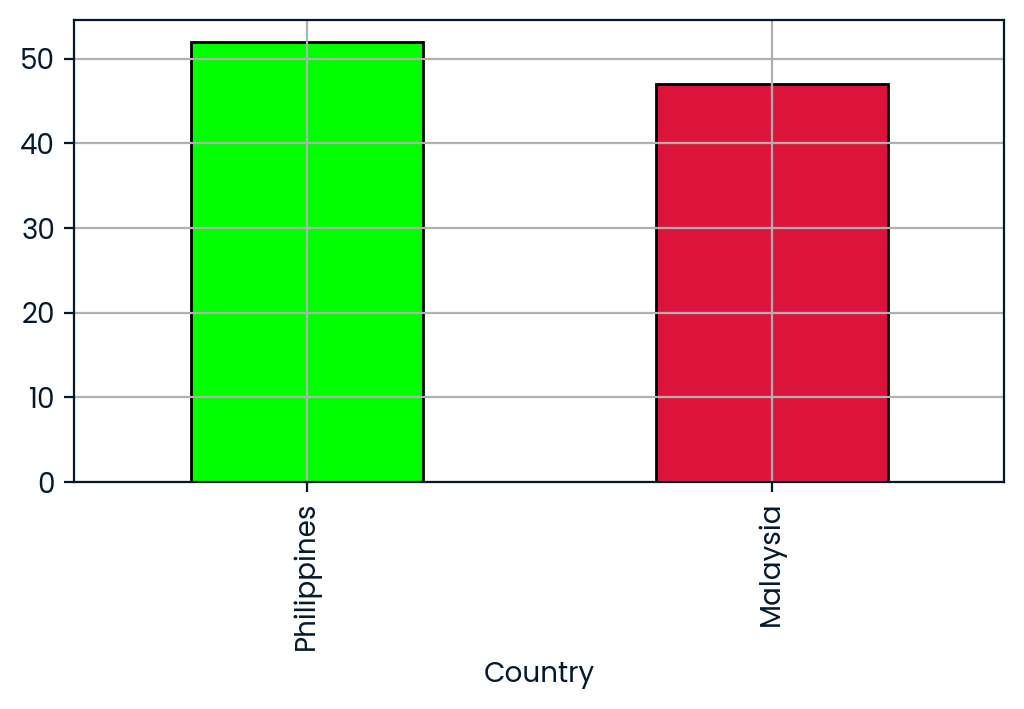

In [116]:
philly.plot.bar(x='Country', y='home_workout_2018_2023', legend=False, edgecolor='black',
               color=['lime', 'crimson'], figsize=(6,3), grid =True)
plt.show()

In [117]:
home_workout_geo = philly.iloc[0, 0]
home_workout_geo
home_workout_geo = 'Philippines'
